<h1> Was van Dijk the Best Defender in the World in 2019?</h1>

<h5> And did he deserve to come 2nd in the Ballon d'Or rankings and win the UEFA Best Player Award? </h5>

In this analysis we will be analysing statistics from the top 5 leagues to see if Liverpool defender Virgil van Dijk was the best defender in the world in 2019.  

We will compare van Dijk to the average defender and to the best defenders in the world.

<h4> Data Used </h4>

I'll be using FBREF Top 5 Leagues Combined data which can be found here: https://github.com/eddwebster/football_analytics/blob/master/data/fbref/engineered/outfield/fbref_outfield_player_stats_combined_latest.csv

<h4> Imports </h4>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from mplsoccer import Radar, FontManager, grid

In [46]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

<h4> Data Handling </h4>

In [47]:
df = pd.read_csv('datasets/fbref_stats.csv')
# df.head()

In [48]:
columns_for_df = ("Player", "Season", "Position Grouped", "Team Name", "Age", "MP", "Starts", "Min", "90s", "Gls", "Ast", "CrdY", "CrdR", "Cmp%", "1/3", "Prog", "Int", "Blocks", "Def", "Tkl", "TklW", "Def 3rd",
                  "Mid 3rd", "Tkl%", "Past", "ShSv", "Pass", "Tkl+Int", "Clr", "Err", "Touches", "Def Pen", "PPM", "onGA", "On-Off", "onxGA", "xG+/-90", "Recov", "Won", "Lost",
                  "Won%")

# "GA90", "SoTA", "W", "D", "L", "CS%"

I'll be creating a new DataFrame which includes columns that I will be using to evaluate defenders.

In [49]:
dfnew = df[list(columns_for_df)].copy()
dfnew.head()

Player     Season Position Grouped     Team Name  Age  MP  Starts  \
0  Aaron Cresswell  2017-2018         Defender      West Ham   27  36      35   
1       Aaron Hunt  2017-2018       Midfielder  Hamburger SV   30  28      26   
2     Aaron Lennon  2017-2018       Midfielder       Burnley   30  14      13   
3     Aaron Lennon  2017-2018          Forward       Everton   30  15       9   
4       Aaron Mooy  2017-2018       Midfielder  Huddersfield   26  36      34   

    Min   90s  Gls  ...  Def Pen   PPM  onGA  On-Off  onxGA  xG+/-90  Recov  \
0  3069  34.1    1  ...    125.0  1.14  60.0    0.84   51.5    -0.40  277.0   
1  2081  23.1    3  ...     28.0  1.07  34.0    0.58   31.3    -0.18  213.0   
2  1118  12.4    0  ...     19.0  1.43  15.0    0.36   15.4    -0.12   80.0   
3   793   8.8    0  ...      7.0  1.27  14.0    0.63   13.7    -0.19   50.0   
4  3067  34.1    4  ...     65.0  0.94  52.0   -0.03   49.8    -0.62  455.0   

    Won  Lost  Won%  
0  70.0  57.0  55.1  
1  22.0  37.0  37.3  
2   7.0  15.0  31.8  
3   6.0  12.0  33.3  
4  35.0  42.0  45.5  

[5 rows x 41 columns]

In [50]:
# print(dfnew.dtypes)

I believe only taking into account players who have played 29 starts should be considered as they're less likely to be outliers as their skill level would be higher.

In [51]:
dfdef = dfnew[(dfnew["Position Grouped"] == "Defender") & (dfnew["Season"] == "2018-2019") & (dfnew["Starts"] >= 29)].reset_index(drop=True)
dfdef.drop(dfdef[dfdef["Player"] == "Virgil van Dijk"].index, axis=0).reset_index(drop=True)
# dfdef[dfdef['Player'].str.contains('Virgil Van Dijk')]
dfdef

Player     Season Position Grouped       Team Name  Age  MP  \
0     Aaron Wan-Bissaka  2018-2019         Defender  Crystal Palace   20  35   
1        AarÃ³n MartÃ­n  2018-2019         Defender        Mainz 05   21  33   
2       Abdoulaye Bamba  2018-2019         Defender          Angers   28  30   
3    Aleksandar Kolarov  2018-2019         Defender            Roma   32  33   
4     Alessio Romagnoli  2018-2019         Defender           Milan   23  32   
..                  ...        ...              ...             ...  ...  ..   
187    Yunis Abdelhamid  2018-2019         Defender           Reims   30  38   
188      Yuri Berchiche  2018-2019         Defender   Athletic Club   28  35   
189         Zeki Ãelik  2018-2019         Defender           Lille   21  34   
190        Ãlex Moreno  2018-2019         Defender  Rayo Vallecano   25  36   
191   Ãlvaro GonzÃ¡lez  2018-2019         Defender      Villarreal   28  33   

     Starts   Min   90s  Gls  ...  Def Pen   PPM  onGA  On-Off  onxGA  \
0        35  3134  34.8    0  ...    179.0  1.31  46.0    0.29   44.2   
1        32  2878  32.0    0  ...    120.0  1.30  50.0    3.34   53.9   
2        29  2573  28.6    0  ...     71.0  1.33  33.0    0.95   35.5   
3        32  2906  32.3    8  ...    128.0  1.73  41.0    0.76   47.6   
4        32  2847  31.6    2  ...    306.0  1.69  32.0   -0.72   33.0   
..      ...   ...   ...  ...  ...      ...   ...   ...     ...    ...   
187      38  3420  38.0    0  ...    310.0  1.45  42.0     NaN   44.9   
188      35  3120  34.7    2  ...    113.0  1.40  40.0    0.54   39.1   
189      34  2971  33.0    1  ...     94.0  2.06  26.0    0.83   37.2   
190      36  3136  34.8    1  ...    129.0  0.86  60.0    0.90   48.3   
191      33  2964  32.9    1  ...    232.0  1.09  47.0   -0.09   45.4   

     xG+/-90  Recov   Won  Lost  Won%  
0       0.07  292.0  31.0  34.0  47.7  
1      -0.21  265.0  14.0  25.0  35.9  
2       0.01  252.0  19.0  21.0  47.5  
3       0.25  303.0  28.0  20.0  58.3  
4       0.16  263.0  70.0  26.0  72.9  
..       ...    ...   ...   ...   ...  
187    -0.11  327.0  88.0  47.0  65.2  
188    -0.10  394.0  66.0  33.0  66.7  
189     0.41  300.0  15.0  28.0  34.9  
190    -0.32  329.0  19.0  34.0  35.8  
191    -0.03  275.0  63.0  33.0  65.6  

[192 rows x 41 columns]

In [52]:
# dfdef.hist(figsize=(12,8))

Replacing null values.

In [53]:
for column in dfdef.columns:
    has_nan = dfdef[column].isna().any()
    if has_nan:
        print(f"'{column}' column has NaN values.")

'On-Off' column has NaN values.


In [54]:
for column in dfdef.columns:
    has_nan = dfdef[column].isna().any()
    if has_nan:
        median = dfdef[column].median()
        mean = dfdef[column].mean()
        print(f"'{column}' column mean: {mean}")
        print(f"'{column}' column median: {median}")
        skewness = dfdef[column].skew()
        print(f"'{column}' 's skewness", skewness)
        
'''
It seems like filling NaN values with median is the best option for this dataset as most of the distributions are skewed.
'''

'On-Off' column mean: 0.18491978609625667
'On-Off' column median: 0.17
'On-Off' 's skewness -4.843938940224432


'\nIt seems like filling NaN values with median is the best option for this dataset as most of the distributions are skewed.\n'

In [55]:
dfdef.fillna(dfdef.median(), inplace=True)

C:\Users\Aykut\AppData\Local\Temp\ipykernel_18656\1041820624.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfdef.fillna(dfdef.median(), inplace=True)


In [56]:
for column in dfdef.columns:
    has_nan = dfdef[column].isna().any()
    if has_nan:
        print(f"'{column}' column has NaN values.")

In [57]:
dfvvd = dfdef[(dfdef["Player"] == "Virgil van Dijk") & (dfdef["Season"] == "2018-2019")].reset_index(drop=True)
dfvvd.head()

Player     Season Position Grouped  Team Name  Age  MP  Starts  \
0  Virgil van Dijk  2018-2019         Defender  Liverpool   27  38      38   

    Min   90s  Gls  ...  Def Pen   PPM  onGA  On-Off  onxGA  xG+/-90  Recov  \
0  3384  37.6    4  ...    264.0  2.55  22.0    1.78   30.4     1.17  524.0   

     Won  Lost  Won%  
0  156.0  39.0  80.0  

[1 rows x 41 columns]

<h3> Creating an average defender</h3>

In [58]:
numeric_columns = dfdef.select_dtypes(include='number').columns
average_row = pd.DataFrame(dfdef[numeric_columns].mean()).T
average_row['Player'] = 'Average Defender'
average_row['Season'] = '2018-2019'
average_row['Position Grouped'] = 'Defender'
dfdef = dfdef.append(average_row, ignore_index=True)

C:\Users\Aykut\AppData\Local\Temp\ipykernel_18656\4251032168.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdef = dfdef.append(average_row, ignore_index=True)


In [59]:
dfdef[dfdef['Player'].str.contains('Average Defender')]

Player     Season Position Grouped Team Name        Age  \
192  Average Defender  2018-2019         Defender       NaN  26.296875   

            MP     Starts          Min        90s       Gls  ...  Def Pen  \
192  33.255208  32.697917  2907.390625  32.301042  1.546875  ...  187.125   

          PPM       onGA    On-Off      onxGA   xG+/-90       Recov  \
192  1.368698  43.114583  0.184531  42.297396  0.001354  319.385417   

           Won     Lost       Won%  
192  57.036458  36.3125  58.259896  

[1 rows x 41 columns]

<h5> Defining the radar chart </h5>

In [60]:
params = ["Cmp%", "1/3", "Prog", "Int", "Blocks", "Def", "Tkl", "TklW", "Def 3rd",
                  "Mid 3rd", "Tkl%", "Past", "ShSv", "Pass", "Tkl+Int", "Clr", "Err", "Touches", "Def Pen", "PPM", "onGA", "On-Off", "onxGA", "xG+/-90", "Recov", "Won%"]

paramsradar = ["Pass Completion Ratio", "Passes to 1/3 ", "Progressive Passes", "Interceptions", "Blocks", "Def2Shot", "No. of Players Tackled", "Tackles Won", "Tackles in def 3rd",
                "Tackles in mid 3rd", " Percentage of dribblers tackled", "Dribbled past", "Blocked Shots", "Blocked Passes", "Tackles+Interceptions", "Clearances", "Errors2Shot", "Touches",
                "Touches in defensive penalty area", "Points per Match", "Goals allowed", "+/- p90", "xGoalsAllowed", "xG +/- p90", "Loose balls recovered", "Aerial duel success rate"]

low = dfdef[params].min().tolist()
high = dfdef[params].max().tolist()

lower_is_better = ['Miscontrol']

radar = Radar(paramsradar, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)


<h3> Virgil van Dijk vs Average Defender </h3>

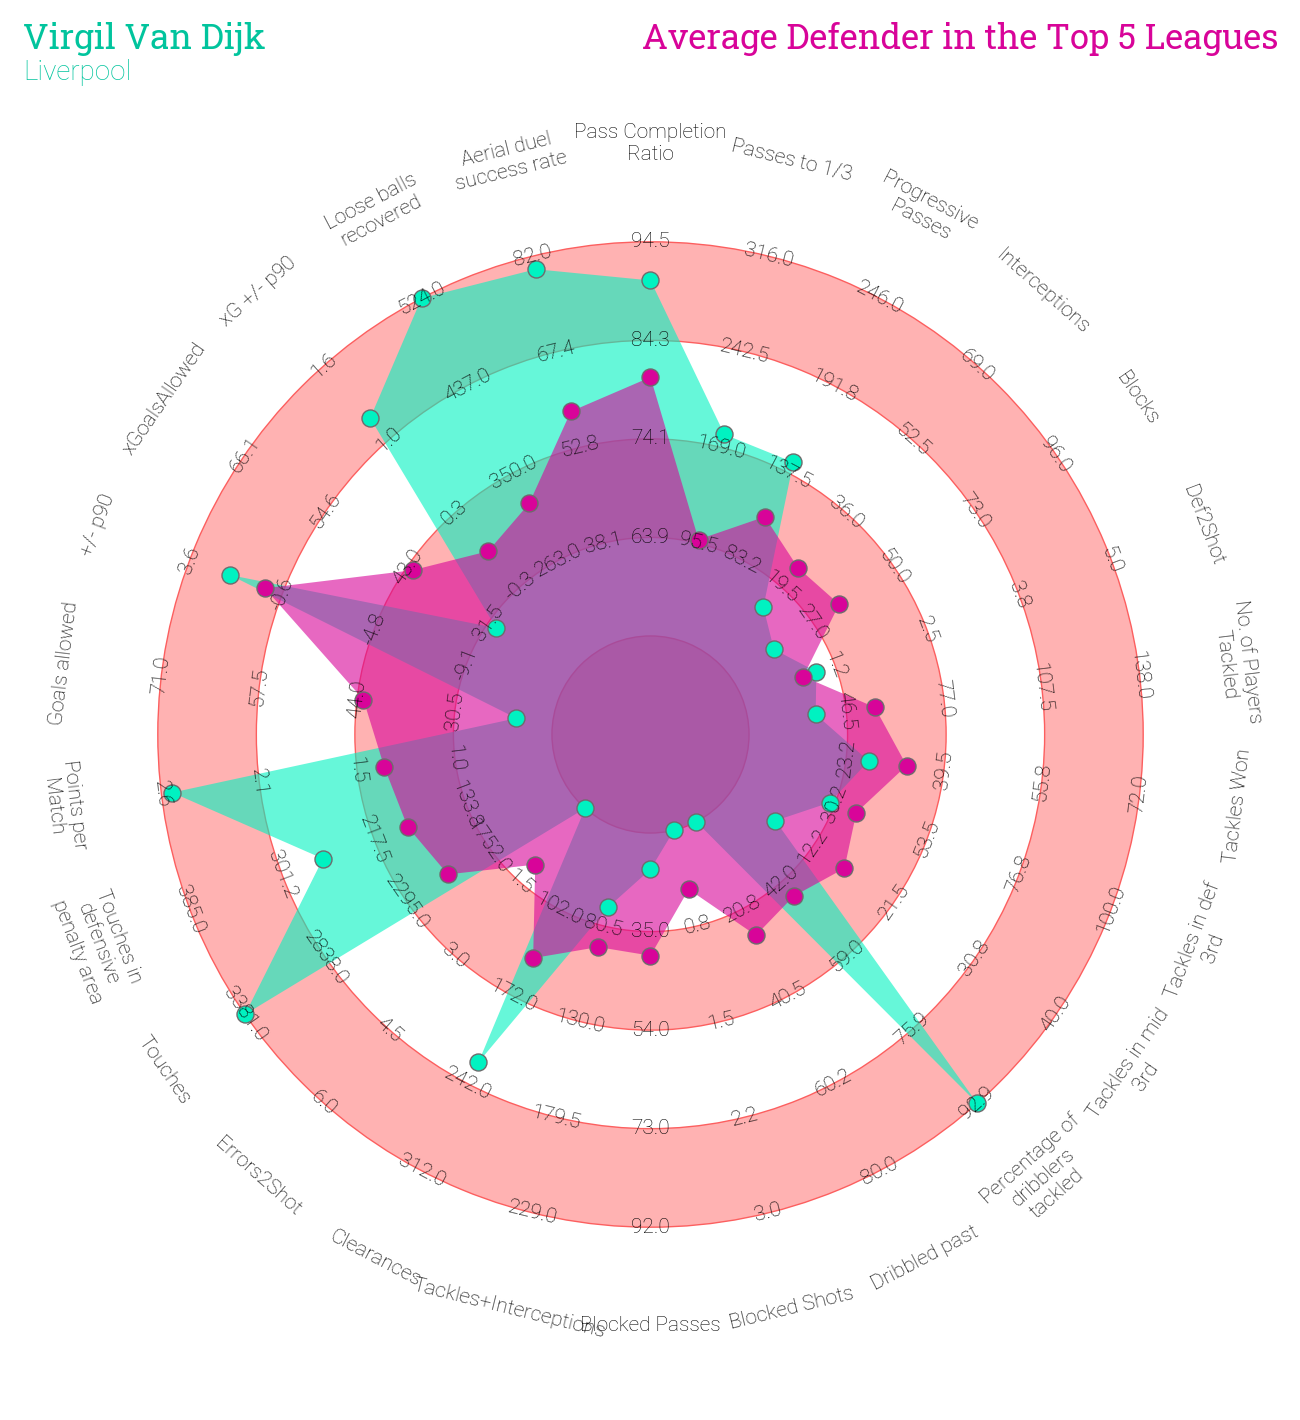

In [61]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
average_values = dfdef.loc[dfdef['Player'] == "Average Defender"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(vvd_values, average_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Average Defender in the Top 5 Leagues', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5> Comments </h5>

As defender of Liverpool, one of the world's strongest sides at the time, Van Dijk isn't expected to have high numbers in stats related to tackling, shot blocking, blocks and interceptions etc. Because Liverpool would have generally had more of the ball, low numbers in these stats don't indicate much. Let us test this by checking Liverpool's statistics that year.

<h5> Liverpool vs. Others </h5>

In [62]:
teamstats = pd.read_csv('datasets/top5leagueteams.csv')
teamstats.head()

Rk            Squad  Country  LgRk  MP   W  D  L   GF  GA  GD  Pts  Pts/MP  \
0   1  Manchester City  eng ENG     1  38  32  2  4   95  23  72   98    2.58   
1   2        Liverpool  eng ENG     2  38  30  7  1   89  22  67   97    2.55   
2   3        Paris S-G   fr FRA     1  38  29  4  5  105  35  70   91    2.39   
3   4         Juventus   it ITA     1  38  28  6  4   70  30  40   90    2.37   
4   5    Bayern Munich   de GER     1  34  24  6  4   88  32  56   78    2.29   

     xG   xGA   xGD  xGD/90  Attendance                Top Team Scorer  \
0  84.3  24.7  59.6    1.57       54130             Sergio Agüero - 21   
1  73.7  28.8  44.9    1.18       52983  Sadio Mané Mohamed Salah - 22   
2  88.9  37.6  51.3    1.35       46911             Kylian Mbappé - 33   
3  60.7  35.8  25.0    0.66       37799         Cristiano Ronaldo - 21   
4  85.6  27.2  58.4    1.72       75000        Robert Lewandowski - 22   

          Goalkeeper  
0            Ederson  
1            Alisson  
2    Alphonse Areola  
3  Wojciech Szczęsny  
4       Manuel Neuer

In [63]:
for column in teamstats.columns:
    has_nan = teamstats[column].isna().any()
    if has_nan:
        print(f"'{column}' column has NaN values.")

<h5>a. xG/XGA - Liverpool vs. Others </h5>

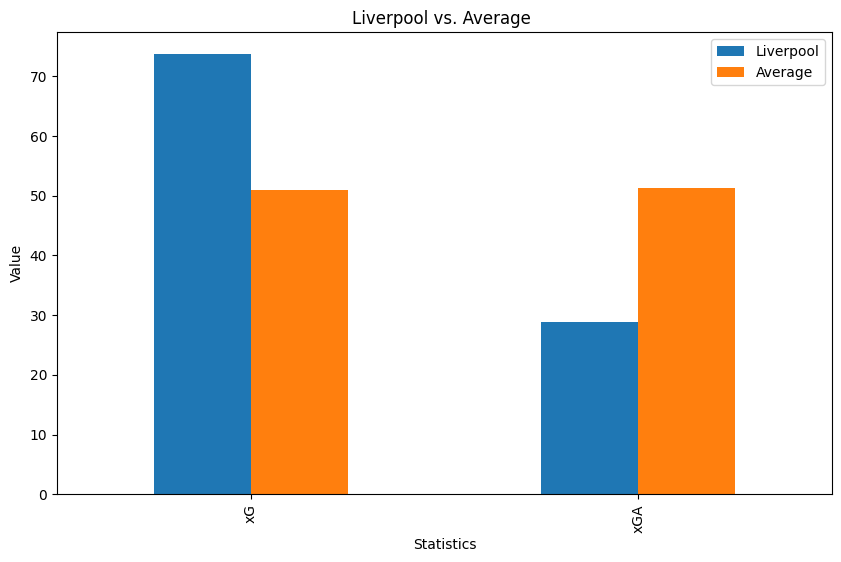

In [64]:

team_name = "Liverpool"
team_stats = teamstats[teamstats['Squad'] == team_name].iloc[0]


average_stats = teamstats[teamstats['Squad'] != team_name][['xG', 'xGA']].mean()


comparison_stats = pd.concat([team_stats[['xG', 'xGA']], average_stats], axis=1)
comparison_stats.columns = ['Liverpool', 'Average']

fig, ax = plt.subplots(figsize=(10, 6))
comparison_stats.plot(kind='bar', ax=ax)
ax.set_xlabel('Statistics')
ax.set_ylabel('Value')
ax.set_title(f'{team_name} vs. Average ')
plt.show()


As seen here, Liverpool have much higher xG and much lower xGA then the average in the top 5 leagues. Now let's check possesion data.

<h5>b. Possesion - Liverpool vs. Others </h5>

In [65]:
posstats = pd.read_csv('datasets/possesiontop5leagues.csv')
posstats.head() 
pos = posstats[["Squad", "Poss", "PrgC", "PrgP"]]
pos.head()

Squad  Poss  PrgC  PrgP
0       Arsenal  58.1   868  1874
1   Bournemouth  46.9   738  1435
2      Brighton  42.4   475  1150
3       Burnley  41.2   421  1032
4  Cardiff City  35.4   434   918

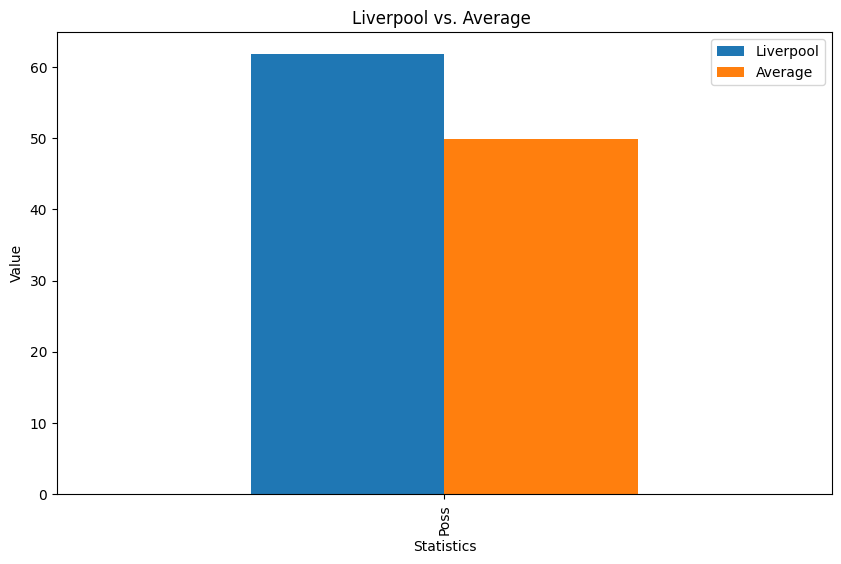

In [66]:
pos_stats = pos[pos['Squad'] == team_name].iloc[0]

average_pos_stats = pos[pos['Squad'] != team_name][['Poss']].mean()

# Combine team stats and average stats into a single DataFrame
comparison_stats = pd.concat([pos_stats[['Poss']], average_pos_stats], axis=1)
comparison_stats.columns = ['Liverpool', 'Average']

# Plot the statistics
fig, ax = plt.subplots(figsize=(10, 6))
comparison_stats.plot(kind='bar', ax=ax)
ax.set_xlabel('Statistics')
ax.set_ylabel('Value')
ax.set_title(f'{team_name} vs. Average ')
plt.show()

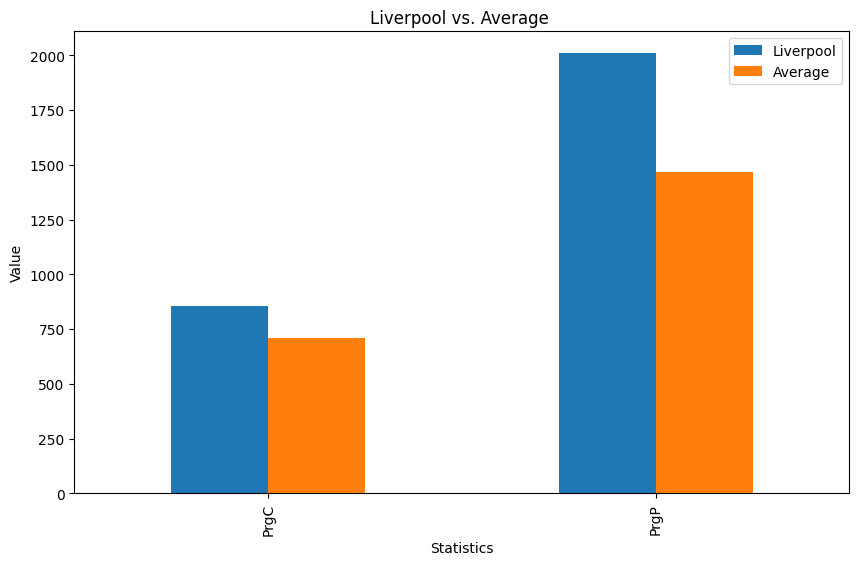

In [67]:
average_prg_stats = pos[pos['Squad'] != team_name][['PrgC', "PrgP"]].mean()

# Combine team stats and average stats into a single DataFrame
comparison_stats = pd.concat([pos_stats[['PrgC', 'PrgP']], average_prg_stats], axis=1)
comparison_stats.columns = ['Liverpool', 'Average']

# Plot the statistics
fig, ax = plt.subplots(figsize=(10, 6))
comparison_stats.plot(kind='bar', ax=ax)
ax.set_xlabel('Statistics')
ax.set_ylabel('Value')
ax.set_title(f'{team_name} vs. Average ')
plt.show()


As seen in these charts, Liverpool have a massive advantage in terms of possesion, which results in more progressive carries and passes as they're the dominant side in the match.

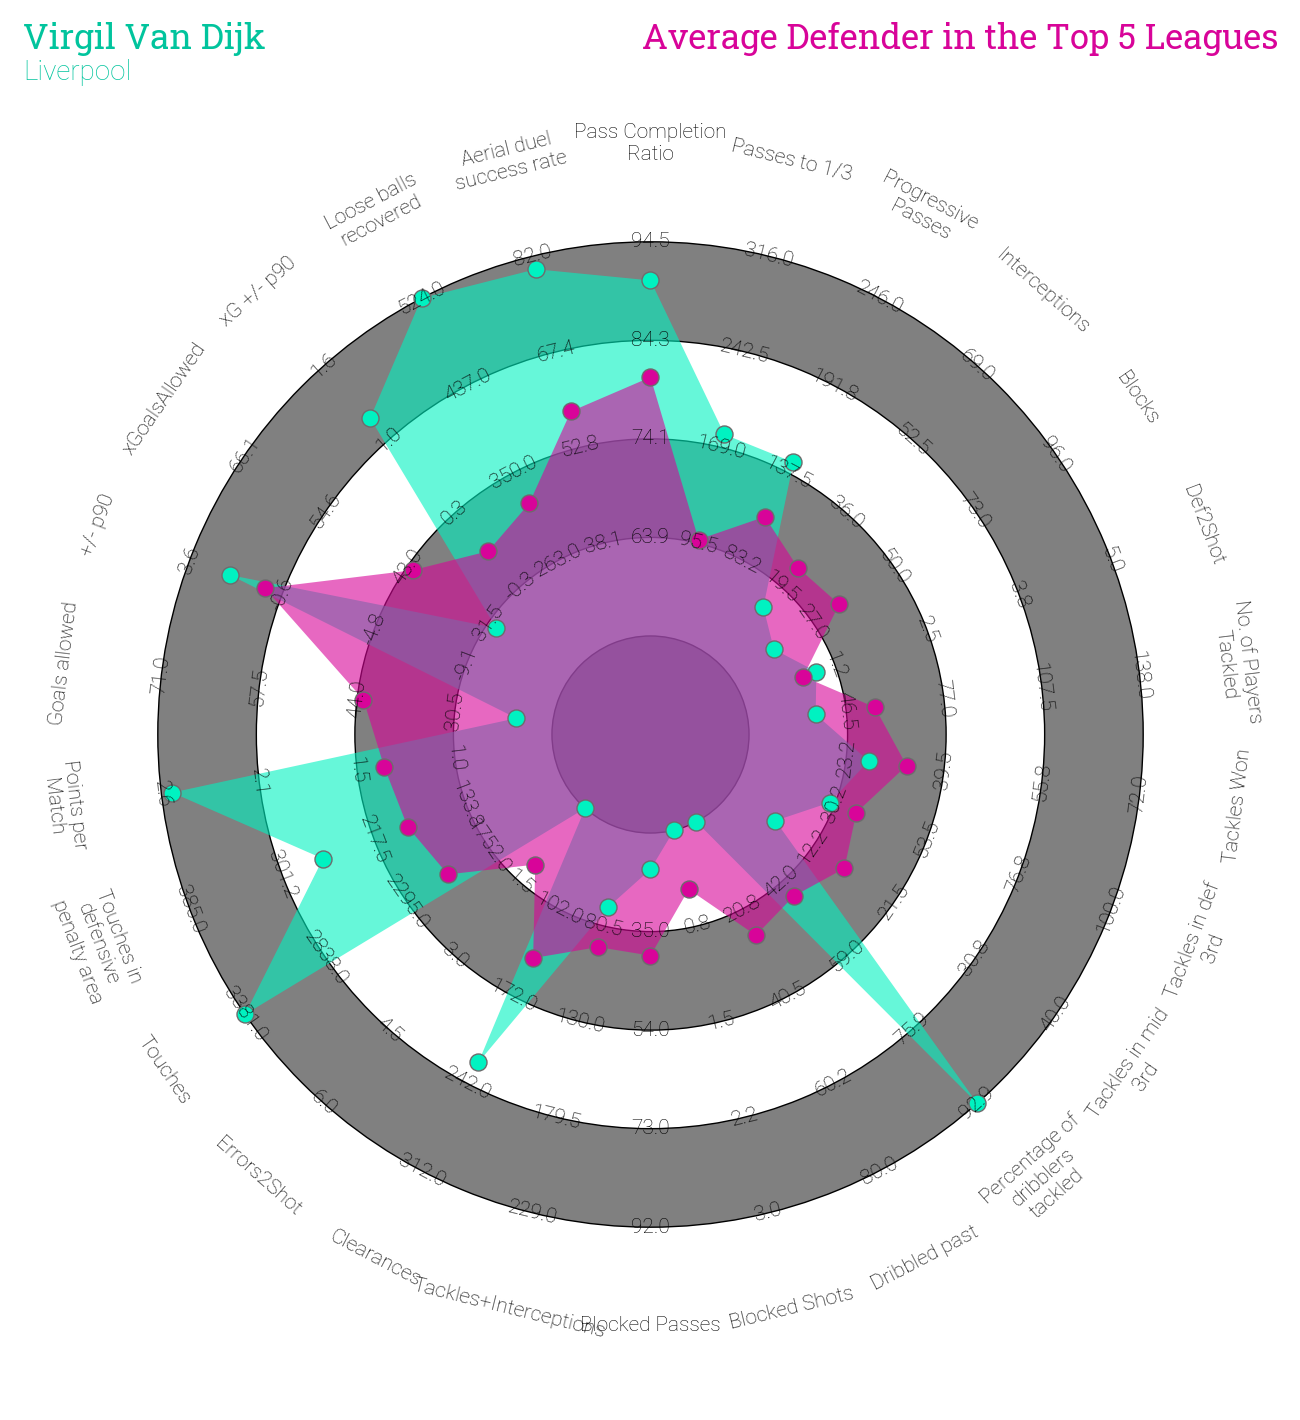

In [68]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
average_values = dfdef.loc[dfdef['Player'] == "Average Defender"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, average_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Average Defender in the Top 5 Leagues', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5> Final comments - VVD vs. Average

As we said before, defensive stats aren't what makes Van Dijk special, though he does boast a whooping 92,9% tackling ratio. It's his ability to play the ball out of the back and start attacks. As seen on the radar, van Dijk's stats in terms of: touches, passes to final third, progressive passes and pass completion ratio are way above average for a defender.

The question we asked in the beginning was, was van Dijk the best defender of the 2018-2019 season and did he deserve to be 2nd place in the Ballon d'Or rankings. Attacking wise, we can confidently say that van Dijk made a massive impact on the way his team attacked. Defending wise, we need to delve in deeper. After that, we will start comparing him with the other elite defenders of football.

To create an equal environment, we will be comparing defensive performances of teams with the 3 lowest xGA's in the 2018-2019 season. This way we will also compare van Dijk with the world's best defending team's defenders. Although this method is questionable, the Ballon d'Or would only be given to players of the bigger teams in football, so I believe it creates an equal environment for comparison.

<h3> Comparison with World's Best Defenders </h3>

<h5> Finding teams with lowest xGA

In [69]:
sorted_df = teamstats.sort_values('xGA')
lowest_values = sorted_df.head(5).reset_index(drop=True)

print("5 teams with the lowest xGA:")
for index, row in lowest_values.iterrows():
    team = row['Squad']
    xga = row['xGA']
    print(f"{index+1}. {team}: {xga}")

5 teams with the lowest xGA:
1. Manchester City: 24.7
2. Bayern Munich: 27.2
3. Liverpool: 28.8
4. Juventus: 35.8
5. Chelsea: 36.4


Manchester City, Bayern Munich, Liverpool and Juventus have turned out to have the lowest xGA in world football. Now lets see who their defenders are.

<h5> Analysis against Manchester City defenders

In [70]:
dfcity = dfdef[(dfdef["Team Name"] == "Manchester City") & (dfdef["Season"] == "2018-2019")].reset_index(drop=True)
dfcity.head()

Player     Season Position Grouped        Team Name   Age    MP  \
0  Aymeric Laporte  2018-2019         Defender  Manchester City  24.0  35.0   
1      Kyle Walker  2018-2019         Defender  Manchester City  28.0  33.0   

   Starts     Min   90s  Gls  ...  Def Pen   PPM  onGA  On-Off  onxGA  \
0    34.0  3057.0  34.0  3.0  ...    240.0  2.54  21.0    0.73   22.8   
1    30.0  2779.0  30.9  1.0  ...     90.0  2.61  17.0   -0.43   20.0   

   xG+/-90  Recov   Won  Lost  Won%  
0     1.44  337.0  76.0  39.0  66.1  
1     1.45  340.0  36.0  18.0  66.7  

[2 rows x 41 columns]

Laporte and Walker are the only 2 that fit our "matches started" criteria. Let's compare these 2 players to van Dijk. First, let's start with Kyle Walker, he mostly plays as a full-back, so the results here shouldn't be too decisive.

<h5>1. VVD vs. Kyle Walker </h5>

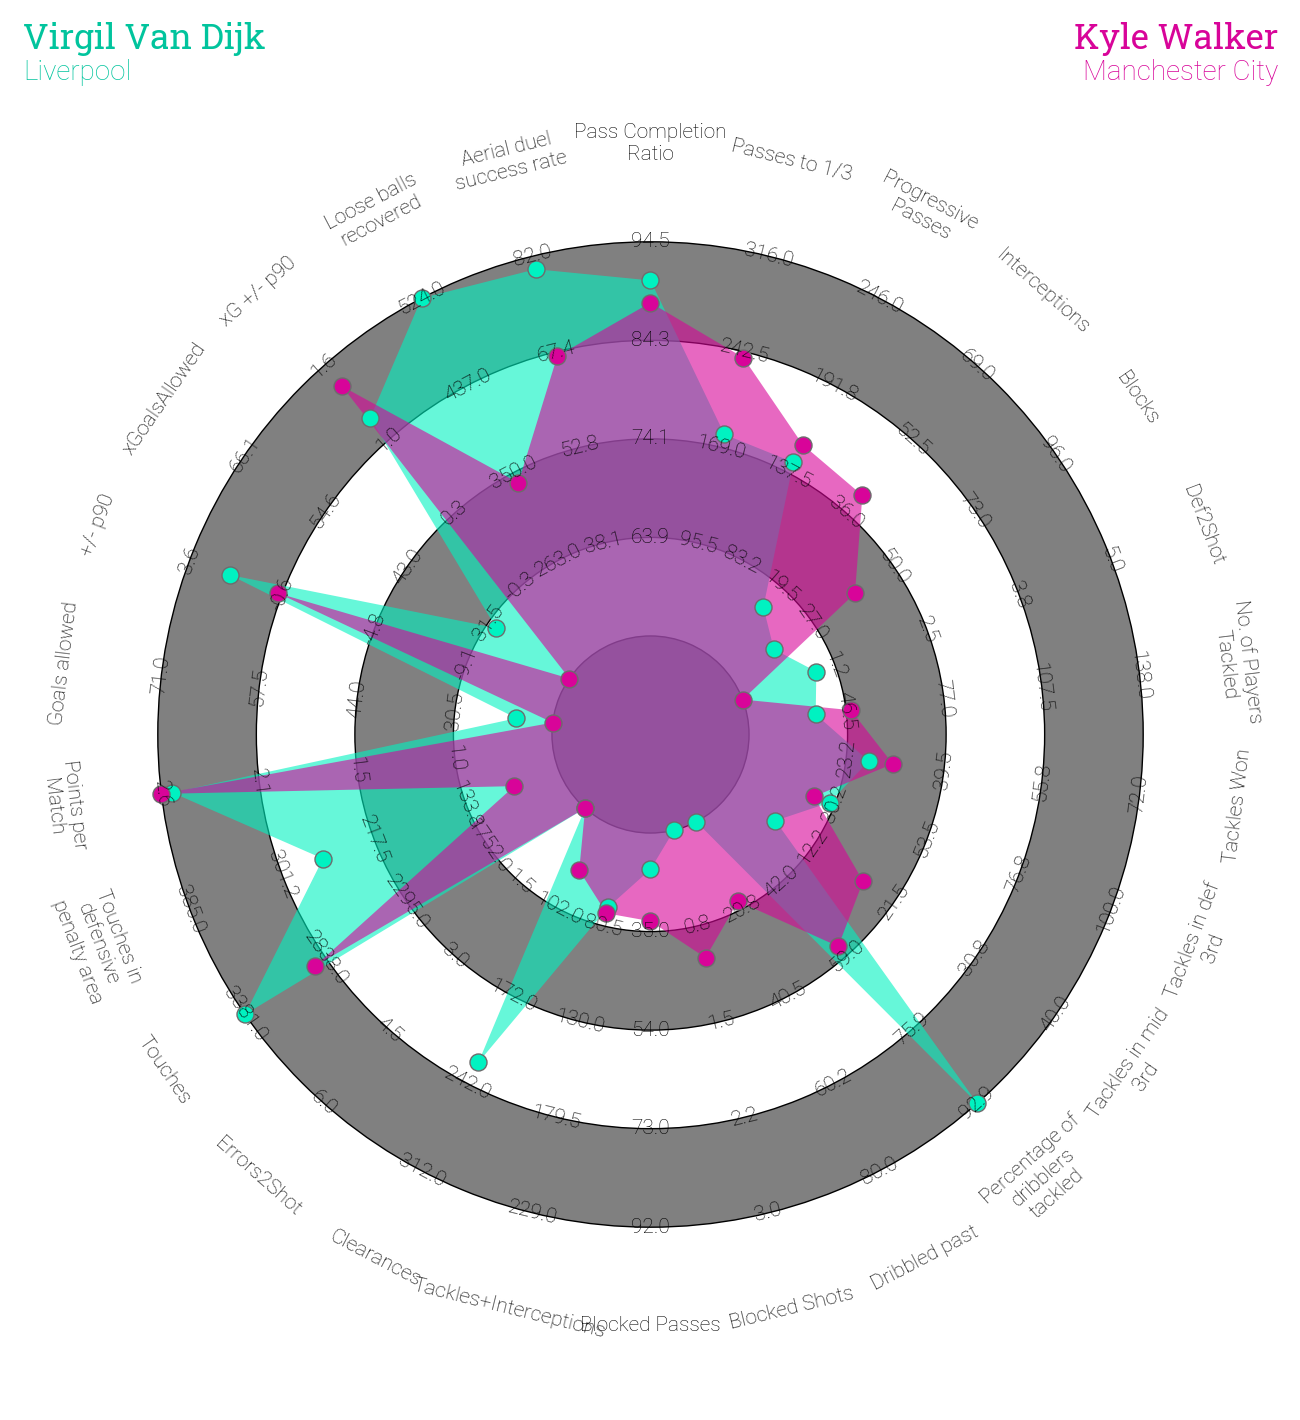

In [71]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
walker_values = dfdef.loc[dfdef['Player'] == "Kyle Walker"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, walker_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Kyle Walker', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Manchester City', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>1. VVD vs. Kyle Walker - Comments </h5>

As seen on the radar, Kyle Walker creates many more passes into the final third than Virgil van Dijk, this is a given as Walker is a full back and goes forward during attacks. Even so, the amount of progressive passes they've made are very close, suggesting van Dijk's attacking movements are unexpected from someone at his position. Even though Walker is a full back, the % of dribblers tackled is very low compared to van Dijk, showing that Walker's attacking side is stronger than defensive. In other defensive categories, van Dijk is mostly ahead as he spends more time inside the box and in front of the goal than Walker.

<h5>1. VVD vs. Kyle Walker - Verdict </h5>

<b>Attack:</b> Walker

<b>Defence:</b> van Dijk

<h5>2. VVD vs. Aymeric Laporte </h5>

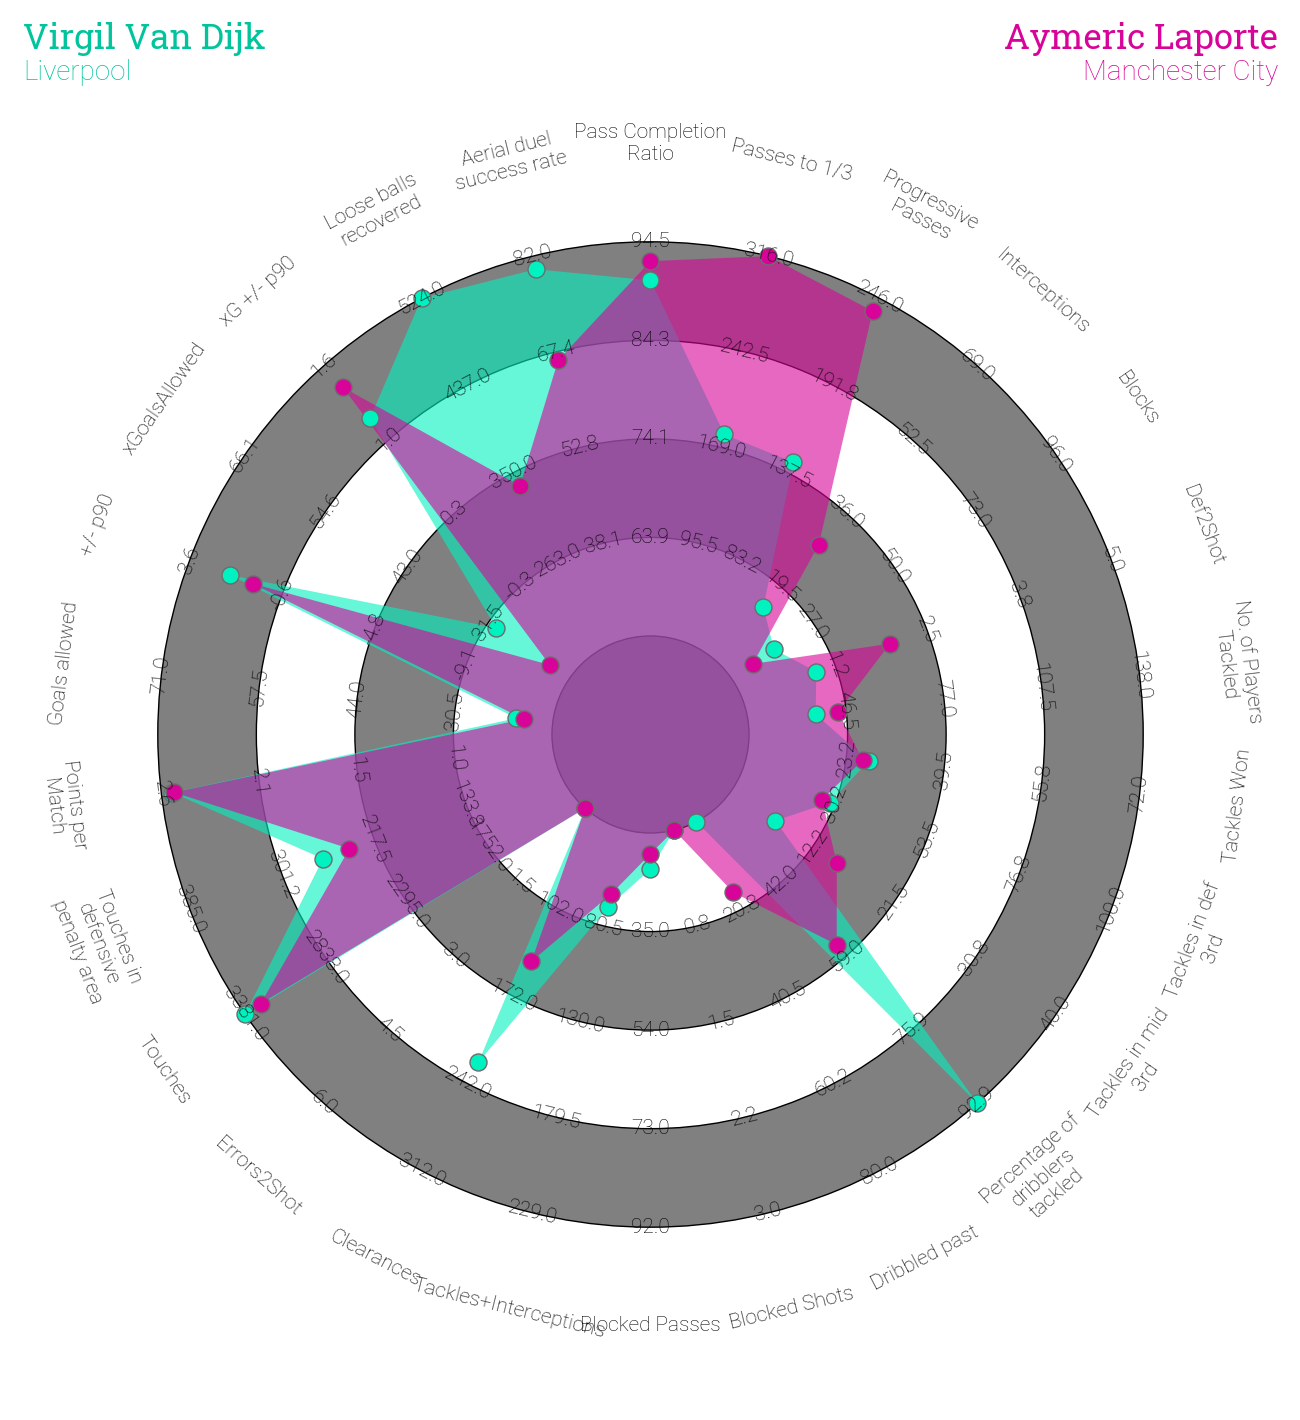

In [72]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
laporte_values = dfdef.loc[dfdef['Player'] == "Aymeric Laporte"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, laporte_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Aymeric Laporte', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Manchester City', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>2. VVD vs. Aymeric Laporte - Comments </h5>

Now we're on to Aymeric Laporte. This is a more accurate comparison than Walker's comparison as Laporte and van Dijk play as central defenders.

On the defensive side, we see van Dijk as the better players with higher statistics in % of dribblers tackled, clearances, aerial success rate, loose balls recovered etc.

On the attacking side however, Laporte seems to have the edge with higher stats in progressive passes and passes to the final third. With lower touches per match, this is interesting to look at.

<h5>2. VVD vs. Aymeric Laporte - Verdict </h5>

<b>Attack:</b> Laporte

<b>Defence:</b> van Dijk

Now we move on to Bayern Munich

<h5> Analysis against Bayern Munich defenders

In [73]:
dfbm = dfdef[(dfdef["Team Name"] == "Bayern Munich") & (dfdef["Season"] == "2018-2019")].reset_index(drop=True)
dfbm.head()

Player     Season Position Grouped      Team Name   Age    MP  \
0     David Alaba  2018-2019         Defender  Bayern Munich  26.0  31.0   
1  Joshua Kimmich  2018-2019         Defender  Bayern Munich  23.0  34.0   
2    Niklas SÃ¼le  2018-2019         Defender  Bayern Munich  22.0  31.0   

   Starts     Min   90s  Gls  ...  Def Pen   PPM  onGA  On-Off  onxGA  \
0    29.0  2530.0  28.1  3.0  ...     50.0  2.29  27.0   -0.47   21.6   
1    34.0  3060.0  34.0  2.0  ...     91.0  2.29  32.0    0.17   25.9   
2    29.0  2654.0  29.5  2.0  ...    209.0  2.23  29.0   -1.17   22.2   

   xG+/-90  Recov   Won  Lost  Won%  
0     1.54  260.0  16.0  14.0  53.3  
1     1.62  349.0  15.0  15.0  50.0  
2     1.63  363.0  52.0  14.0  78.8  

[3 rows x 41 columns]

Alaba, Kimmich and Süle have come up. Let's compare.

<h5>1. VVD vs. David Alaba </h5>

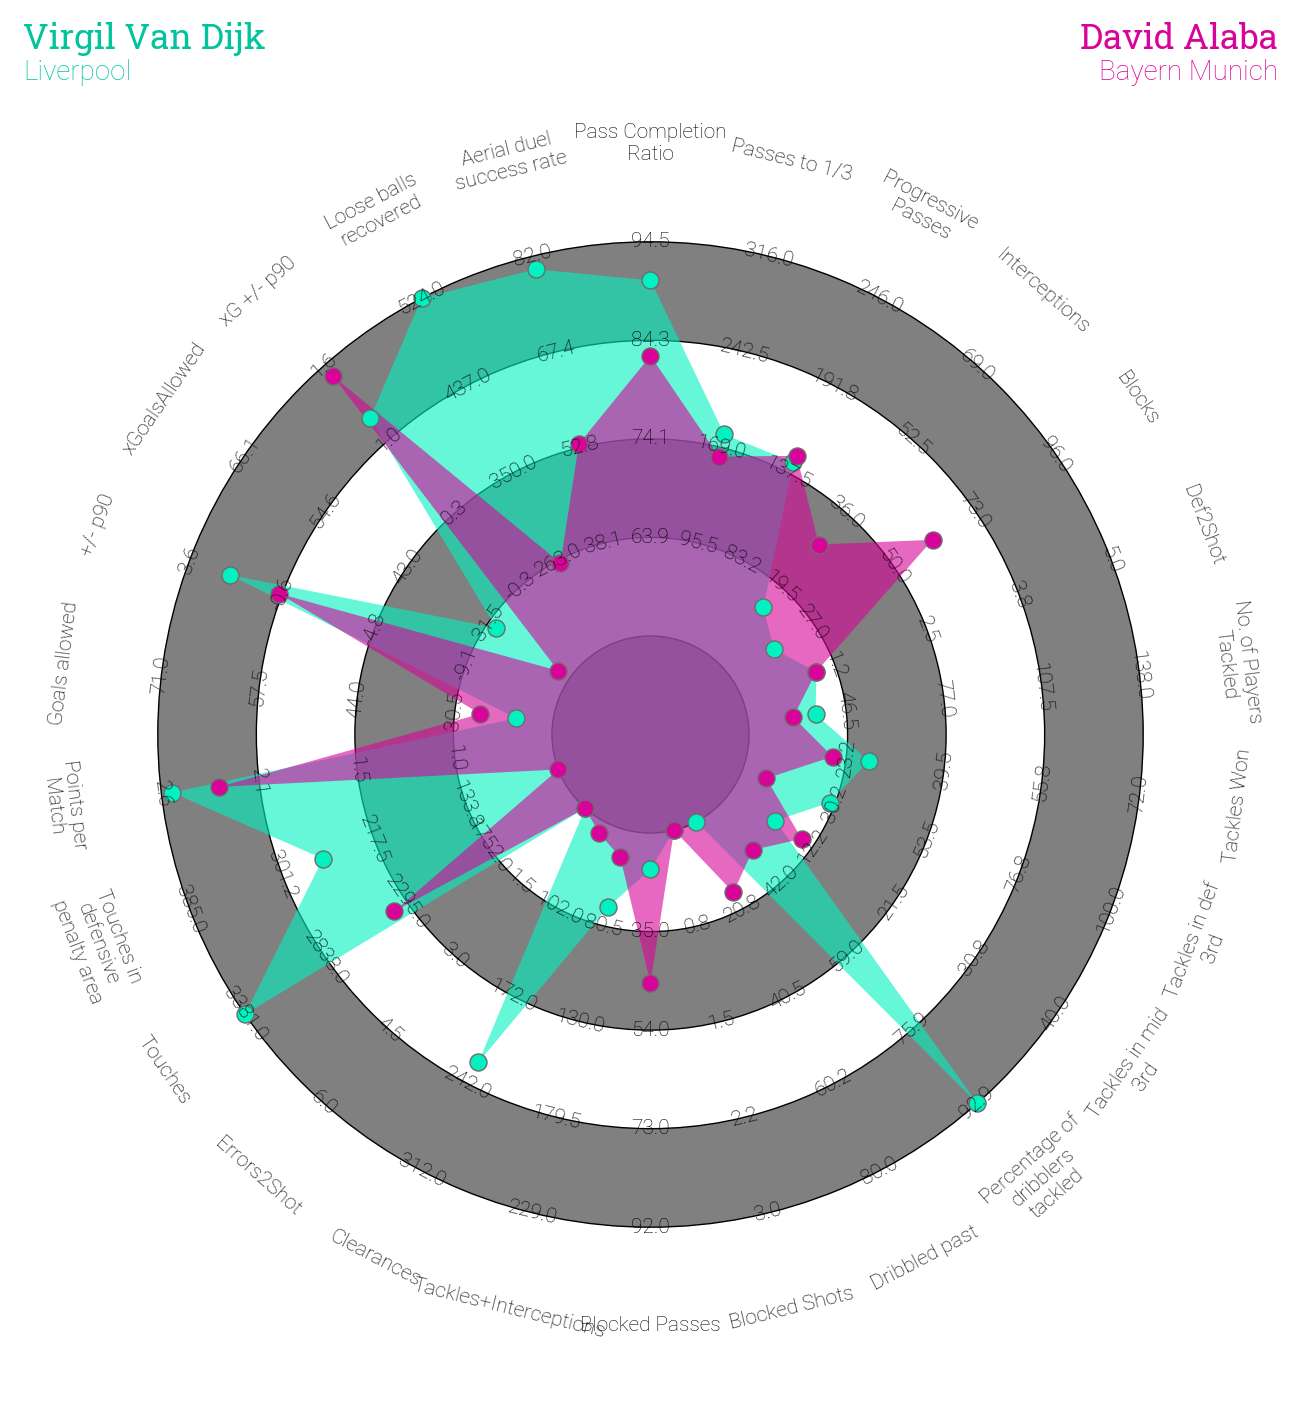

In [74]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
alaba_values = dfdef.loc[dfdef['Player'] == "David Alaba"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, alaba_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'David Alaba', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Bayern Munich', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>1. VVD vs. David Alaba - Comments </h5>

Once again, defensively van Dijk looks to be slightly the better performer. Attacking wise, we can say they're pretty much the same.

<h5>1. VVD vs. David Alaba - Verdict </h5>

<b>Attack:</b> Equal

<b>Defence:</b> van Dijk

<h5>2. VVD vs. Joshua Kimmich </h5>

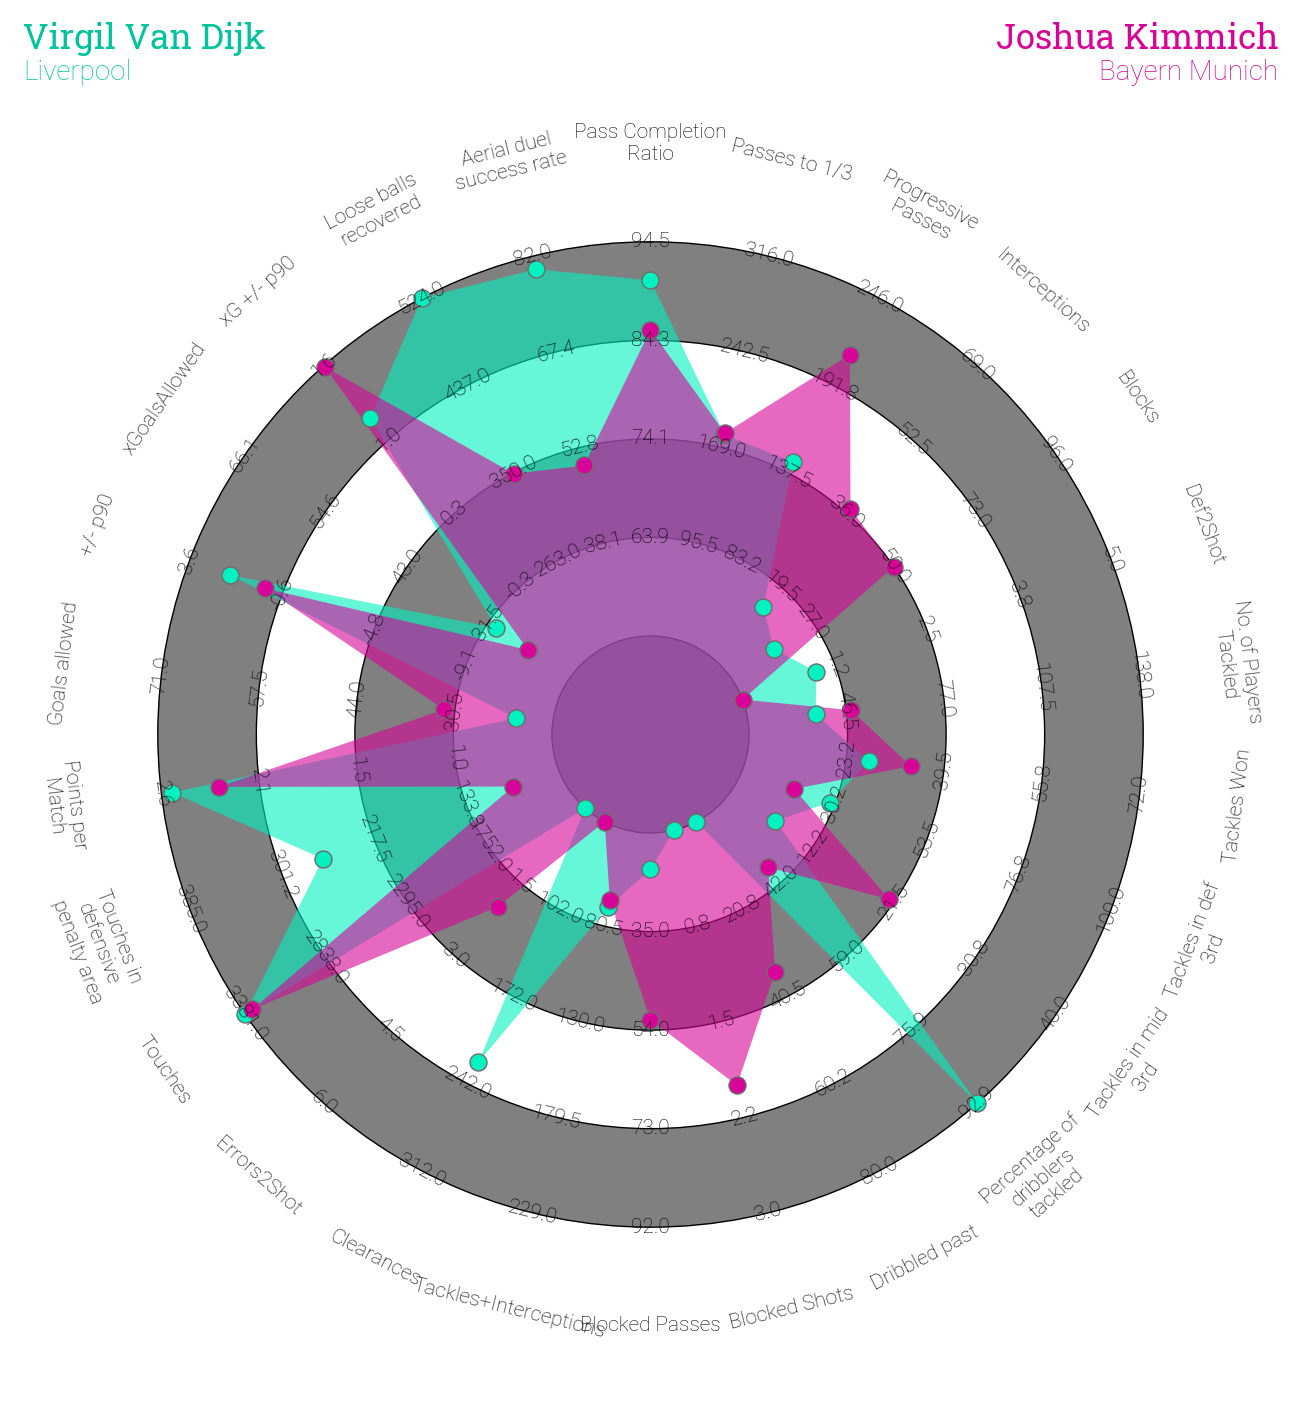

In [75]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
kimmich_values = dfdef.loc[dfdef['Player'] == "Joshua Kimmich"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, kimmich_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Joshua Kimmich', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Bayern Munich', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>2. VVD vs. Joshua Kimmich - Comments </h5>

van Dijk is ahead in clearances, tackle %, loose balls recovered and aerial success rate. In contrast, Kimmich leads the way in blocked shots, blocked passes, tackles won, interceptions and blocks.

Attacking wise, Kimmich looks to be the better player. This might be because Kimmich can play full back and defensive midfielder.

One interesting statistic to note, Kimmich has the most errors leading to shots in our analysis so far.

<h5>2. VVD vs. Joshua Kimmich - Verdict </h5>

<b>Attack:</b> Kimmich

<b>Defence:</b> Kimmich

<h5>3. VVD vs. Niklas Süle </h5>

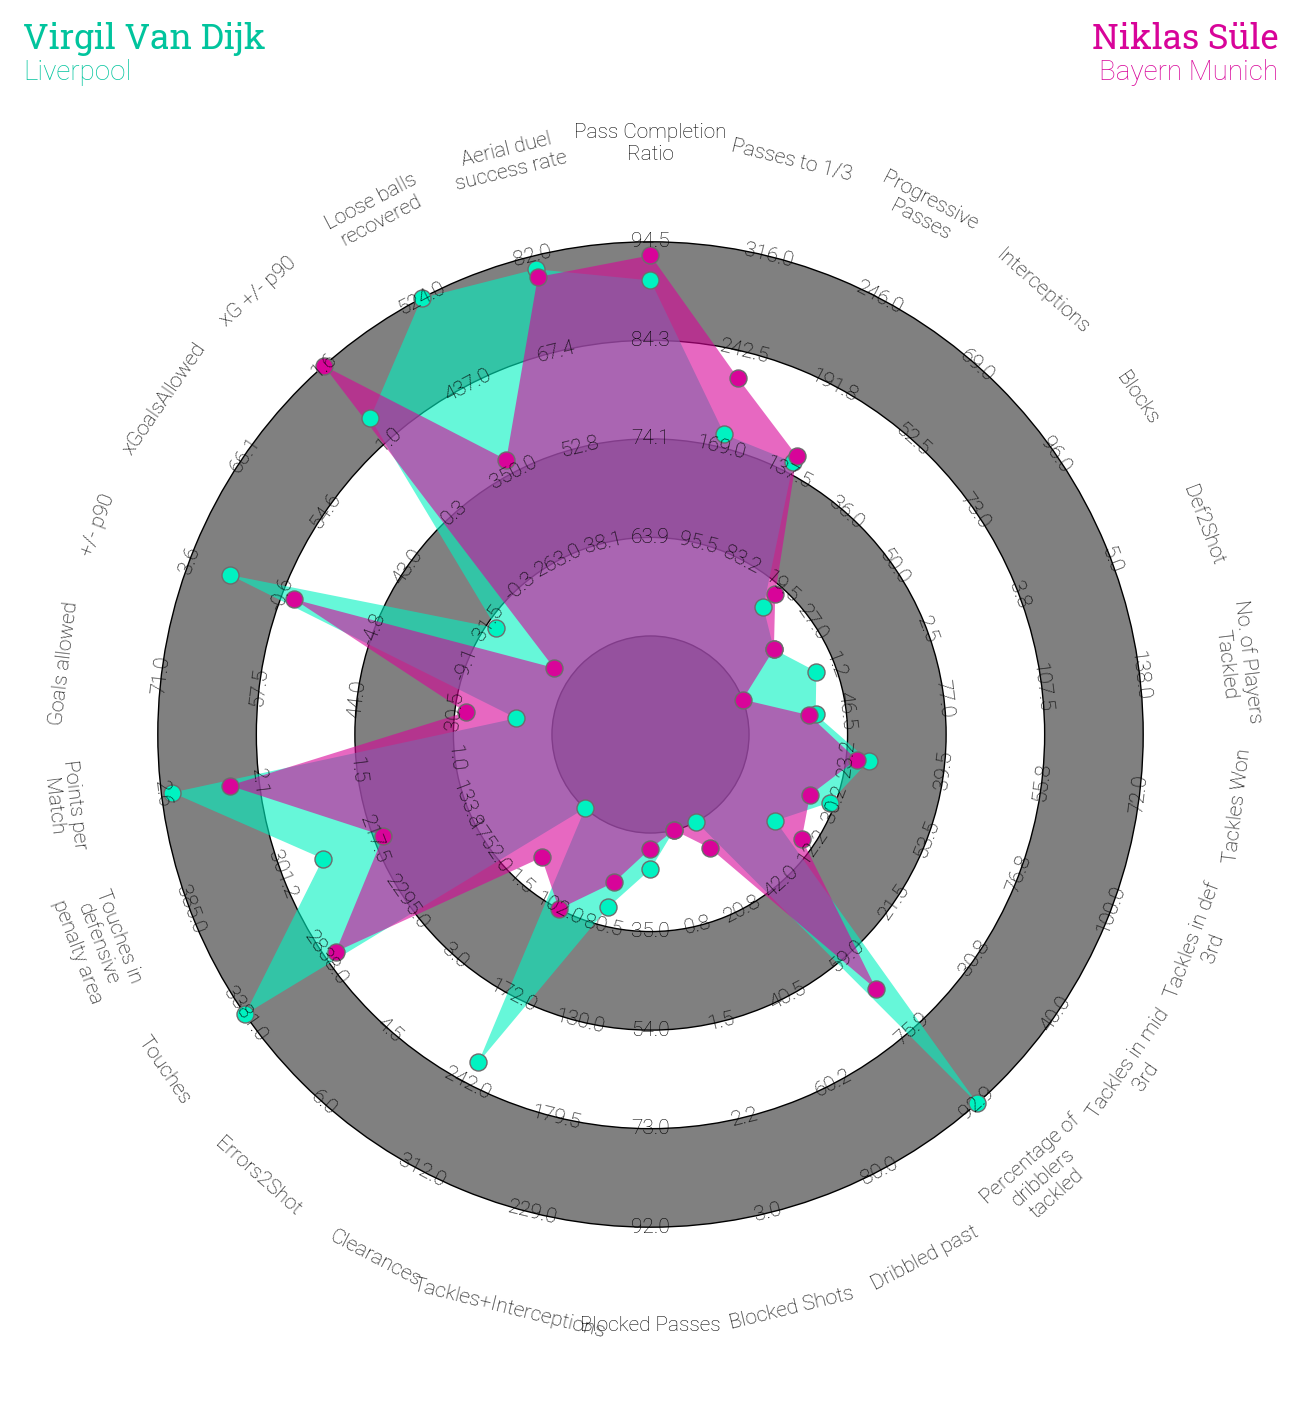

In [76]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
sule_values = dfdef.loc[dfdef['Player'] == "Niklas SÃ¼le"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, sule_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Niklas Süle', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Bayern Munich', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>3. VVD vs. Niklas Süle - Comments </h5>

Defending wise, van Dijk looks to be the better performer. Attacking wise, Süle seems to be the better performer.

<h5>3. VVD vs. Niklas Süle - Verdict </h5>

<b>Attack:</b> Süle

<b>Defence:</b> van Dijk

On to Juventus.

<h5> Analysis against Juventus defenders

In [77]:
dfjuve = dfdef[(dfdef["Team Name"] == "Juventus") & (dfdef["Season"] == "2018-2019")].reset_index(drop=True)
dfjuve.head()

Empty DataFrame
Columns: [Player, Season, Position Grouped, Team Name, Age, MP, Starts, Min, 90s, Gls, Ast, CrdY, CrdR, Cmp%, 1/3, Prog, Int, Blocks, Def, Tkl, TklW, Def 3rd, Mid 3rd, Tkl%, Past, ShSv, Pass, Tkl+Int, Clr, Err, Touches, Def Pen, PPM, onGA, On-Off, onxGA, xG+/-90, Recov, Won, Lost, Won%]
Index: []

[0 rows x 41 columns]

It seems like Juve don't have any players that match our "started matches" criteria. We'll continue with Chelsea which was number 5 on the list.

<h5> Analysis against Chelsea defenders

In [78]:
dfchels = dfdef[(dfdef["Team Name"] == "Chelsea") & (dfdef["Season"] == "2018-2019")].reset_index(drop=True)
dfchels.head()

Player     Season Position Grouped Team Name   Age    MP  \
0    Antonio RÃ¼diger  2018-2019         Defender   Chelsea  25.0  33.0   
1  CÃ©sar Azpilicueta  2018-2019         Defender   Chelsea  28.0  38.0   
2          David Luiz  2018-2019         Defender   Chelsea  31.0  36.0   
3       Marcos Alonso  2018-2019         Defender   Chelsea  27.0  31.0   

   Starts     Min   90s  Gls  ...  Def Pen   PPM  onGA  On-Off  onxGA  \
0    33.0  2871.0  31.9  1.0  ...    241.0  1.85  35.0   -1.01   30.1   
1    38.0  3402.0  37.8  1.0  ...    133.0  1.89  39.0    0.63   34.7   
2    36.0  3238.0  36.0  3.0  ...    297.0  1.92  36.0    0.67   32.9   
3    31.0  2759.0  30.7  2.0  ...    119.0  1.97  28.0    0.78   28.0   

   xG+/-90  Recov   Won  Lost  Won%  
0     0.54  379.0  72.0  57.0  55.8  
1     0.62  392.0  51.0  39.0  56.7  
2     0.61  372.0  75.0  46.0  62.0  
3     0.65  325.0  62.0  44.0  58.5  

[4 rows x 41 columns]

We have 4 players suitable at Chelsea. The 3 players beside Rüdiger generally play in a more attacking manner, let's see if the stats back that. Let's compare. Starting with Rüdiger.

<h5>1. VVD vs. Antonio Rüdiger </h5>

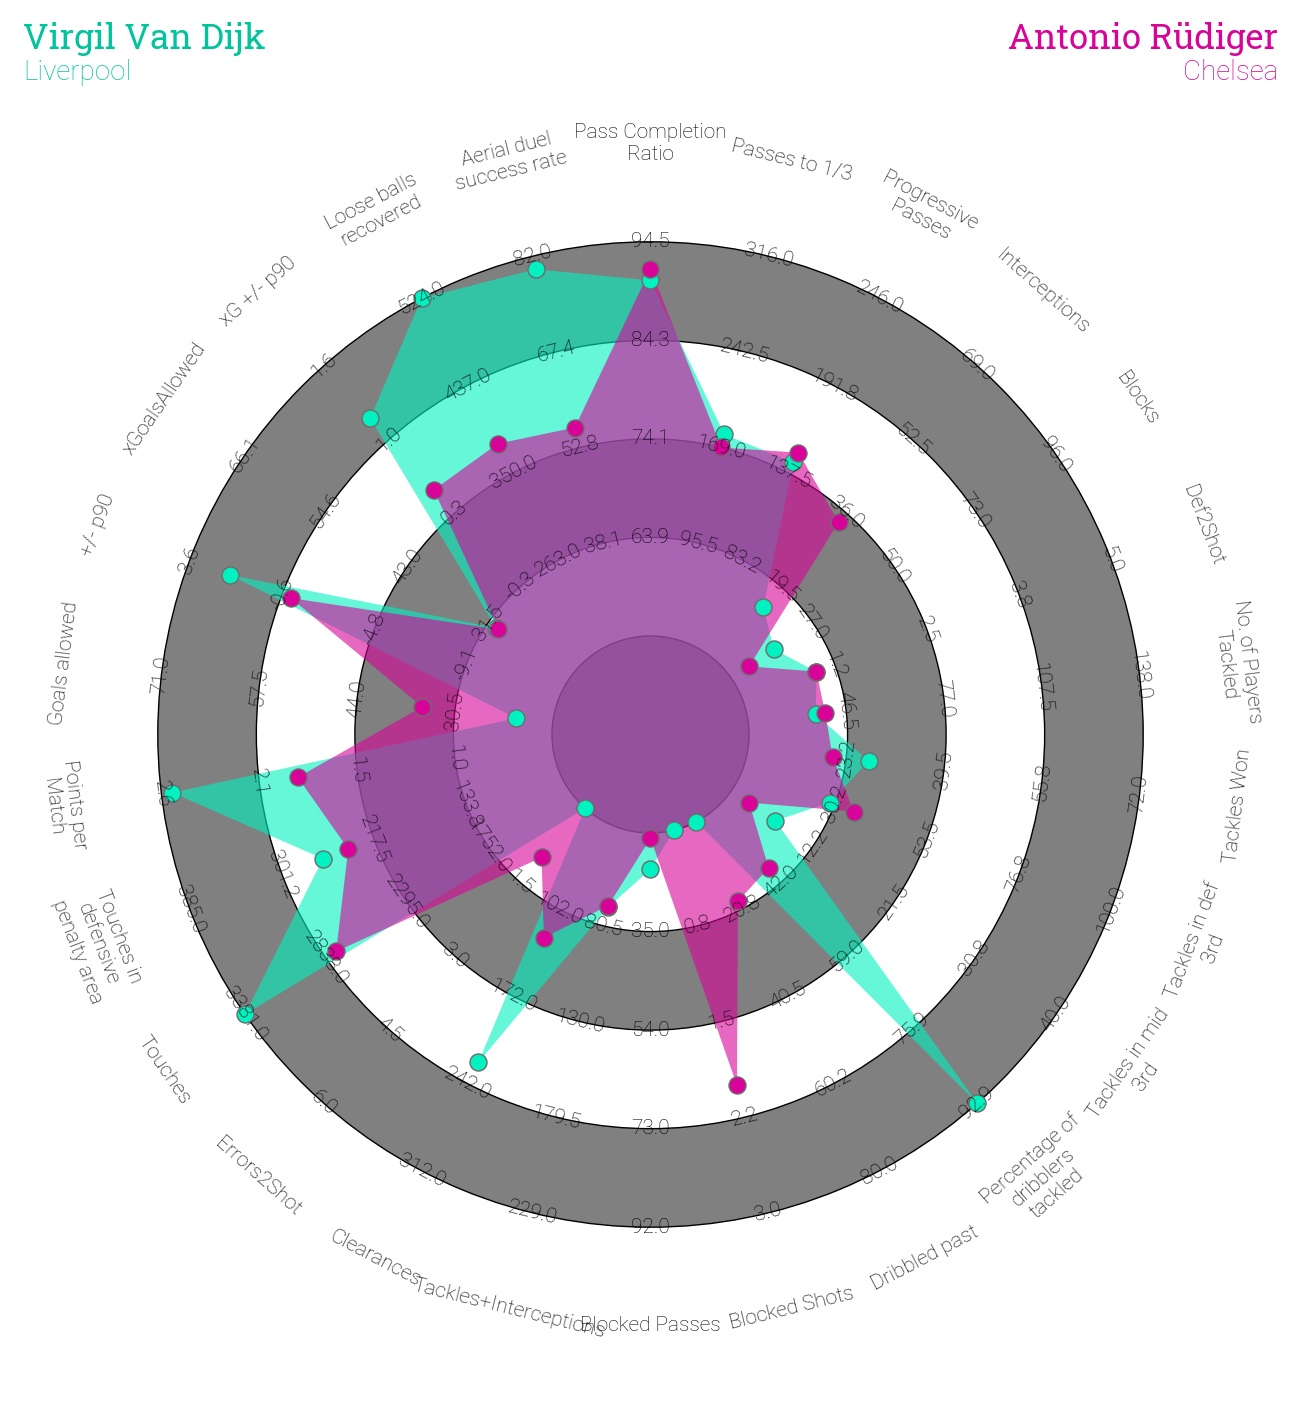

In [79]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
rudiger_values = dfdef.loc[dfdef['Player'] == "Antonio RÃ¼diger"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, rudiger_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Antonio Rüdiger', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Chelsea', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>        1. VVD vs. Antonio Rüdiger - Comments </h5>

Defending wise, van Dijk looks to be the better performer. Attacking wise, they seem to be performing pretty similarly.

<h5>1. VVD vs. Antonio Rüdiger - Verdict </h5>

<b>Attack:</b> Equal

<b>Defence:</b> van Dijk

<h5>2. VVD vs. Cesar Azpilicueta </h5>

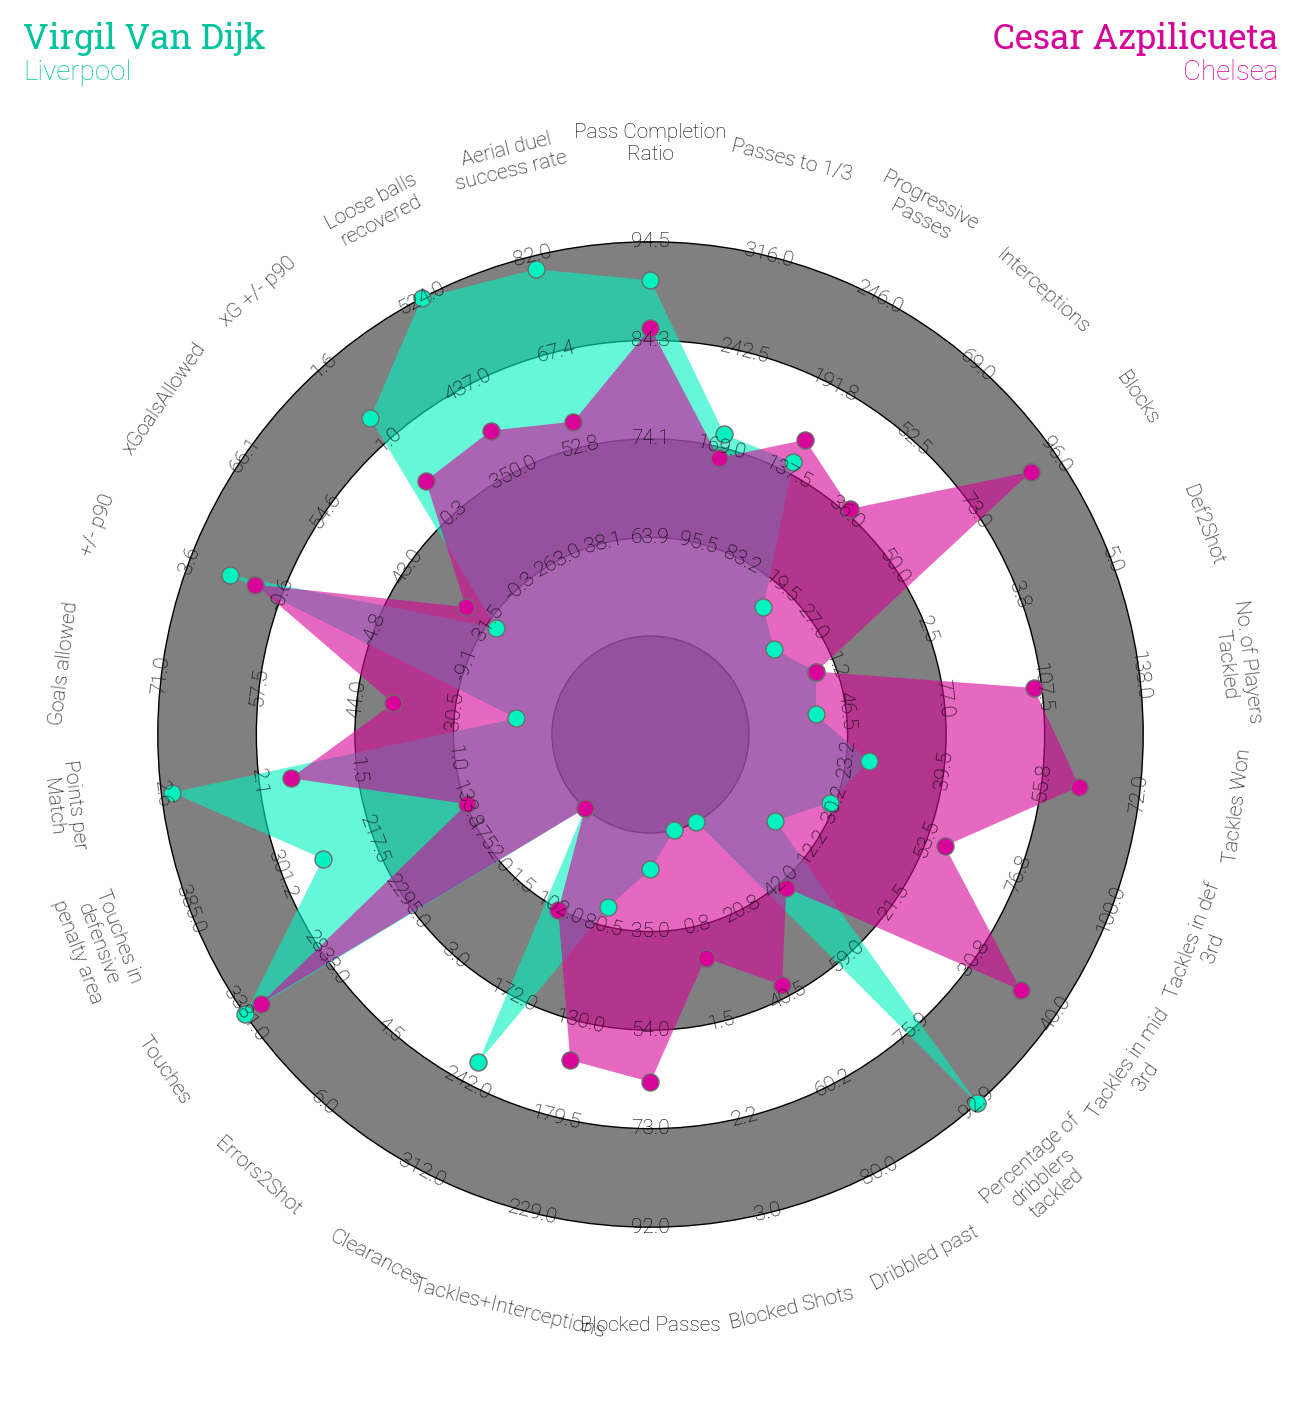

In [80]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
azpi_values = dfdef.loc[dfdef['Player'] == "CÃ©sar Azpilicueta"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, azpi_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Cesar Azpilicueta', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Chelsea', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>2. VVD vs. Cesar Azpilicueta - Comments </h5>

Defending wise, Azpilicueta seems to performing outstandingly, a lot more tackling, blocking and intercepting going on. The question of why Azpi's defending stats are so high might be able to be answered by looking at the points per match stat. Chelsea are grabbing more than 0.5 points less than Liverpool, this might indicate that Chelsea weren't a dominant attacking side and were defending a lot of the time too. Attacking wise, they seem to be performing pretty similarly.

<h5>2. VVD vs. Cesar Azpilicueta - Verdict </h5>

<b>Attack:</b> Equal

<b>Defence:</b> Azpilicueta

<h5>3. VVD vs. David Luiz </h5>

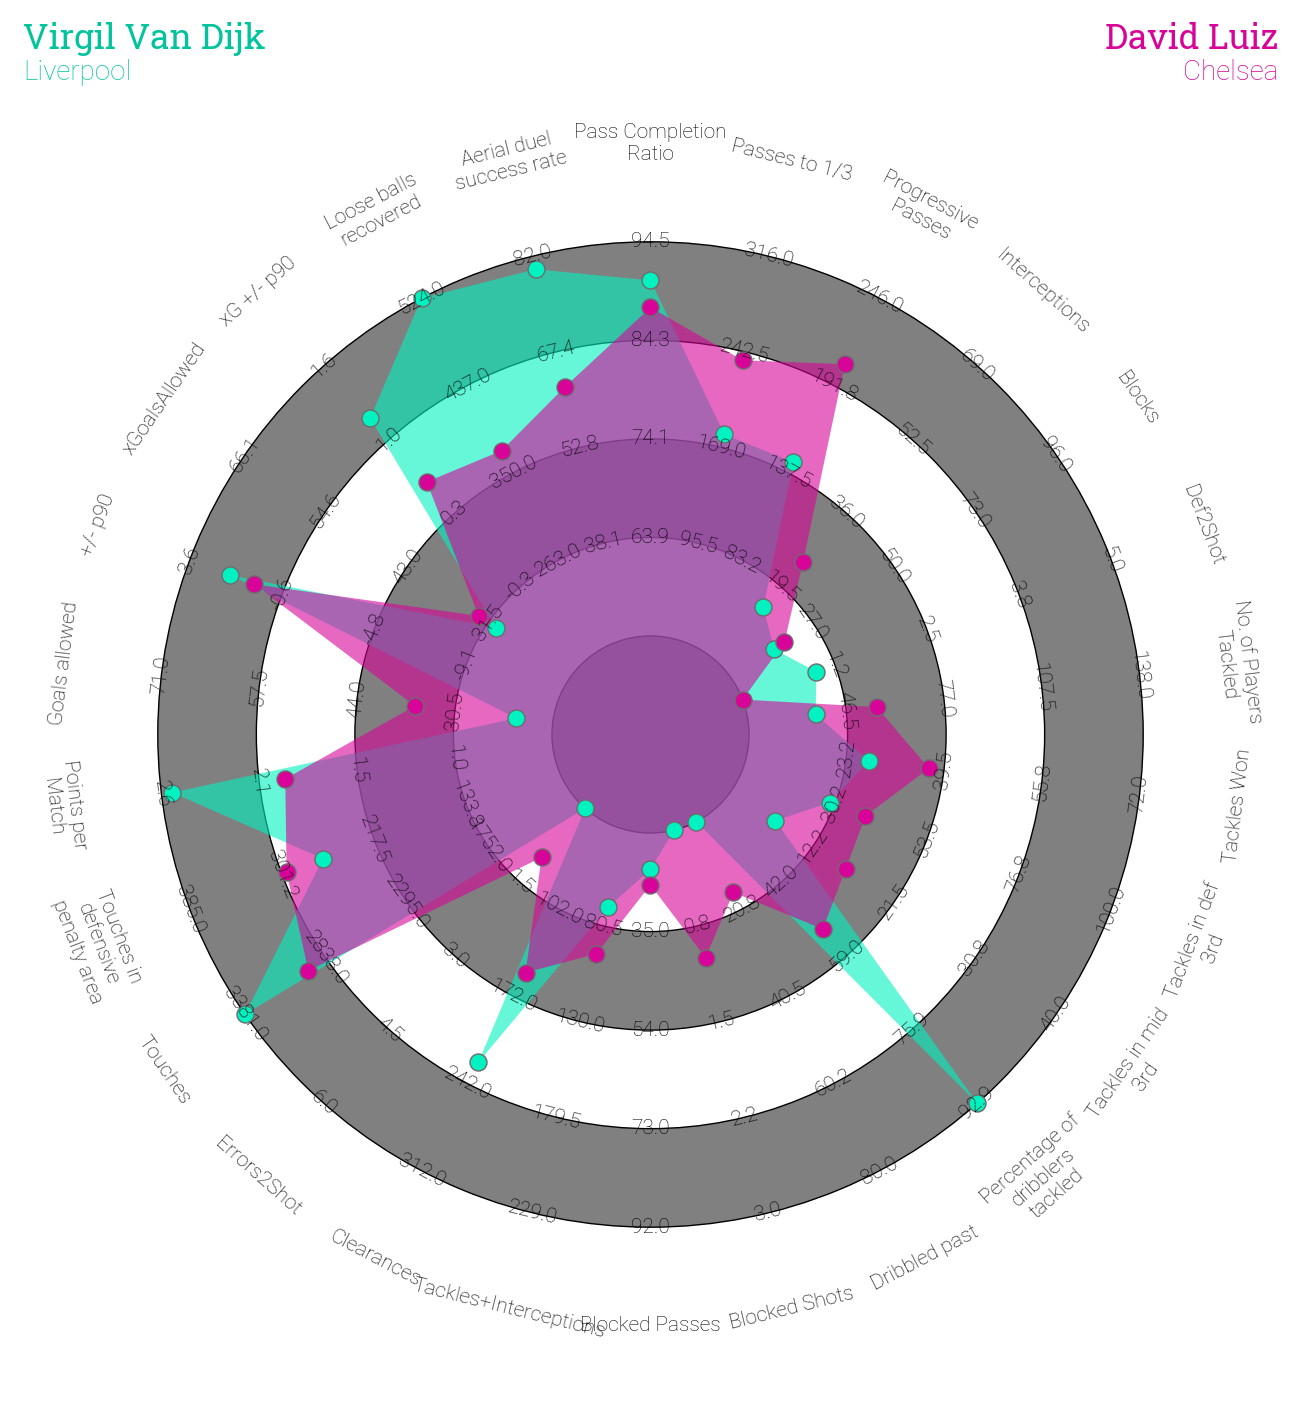

In [81]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
luiz_values = dfdef.loc[dfdef['Player'] == "David Luiz"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, luiz_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'David Luiz', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Chelsea', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>3. VVD vs. David Luiz - Comments </h5>

Defending wise, they seem to be performing pretty similarly even though Luiz is a bit higher. Attacking wise Luiz has an edge, indicating he really is being used as more of an attacking player like we discussed earlier. The difference between the defensive statistics of Azpilicueta and Luiz strengthen this notion.

<h5>3. VVD vs. David Luiz - Verdict </h5>

<b>Attack:</b> Luiz

<b>Defence:</b> Equal

<h5>4. VVD vs. Marcos Alonso </h5>

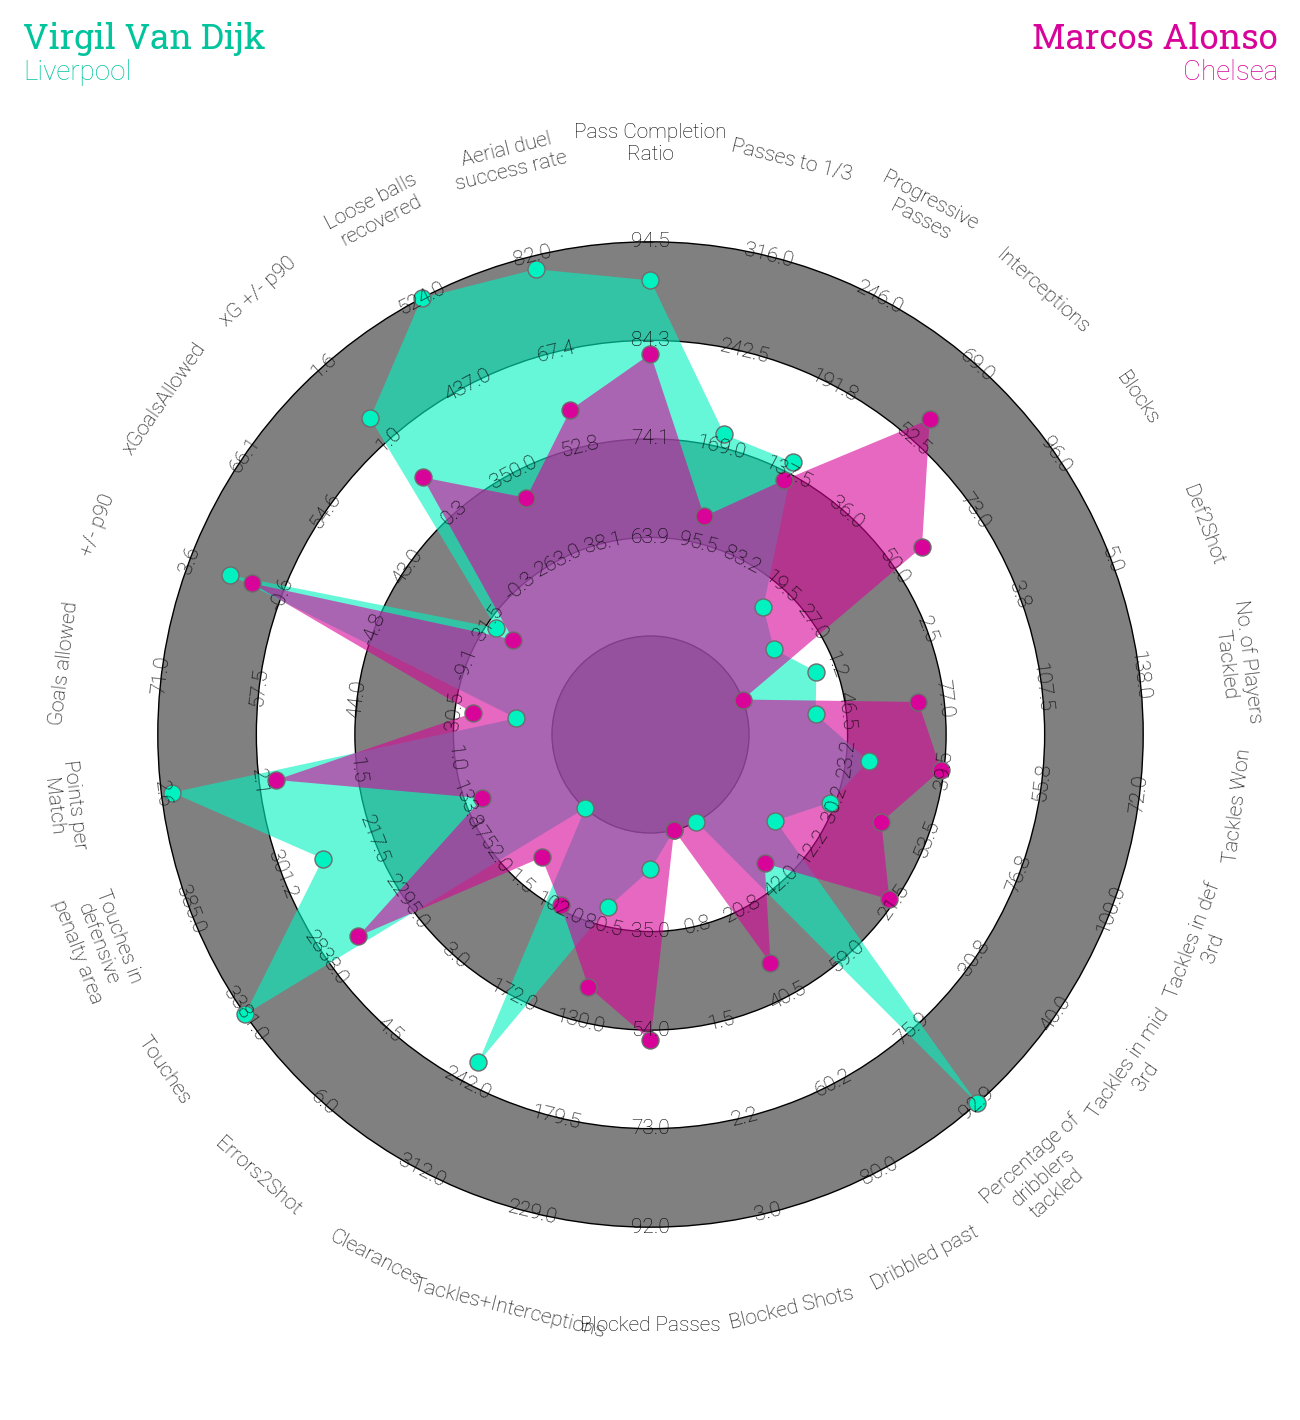

In [82]:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

vvd_values = dfvvd.loc[dfvvd['Player'] == "Virgil van Dijk"][params].values.tolist()[0]
alonso_values = dfdef.loc[dfdef['Player'] == "Marcos Alonso"][params].values.tolist()[0]


# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='gray', edgecolor='black')
radar_output = radar.draw_radar_compare(vvd_values, alonso_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)


title1_text = axs['title'].text(0.01, 0.65, 'Virgil Van Dijk', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Liverpool', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Marcos Alonso', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title2_text = axs['title'].text(0.99, 0.25, 'Chelsea', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, '', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')

<h5>4. VVD vs. Marcos Alonso - Comments </h5>

Once again, defending wise we see that Alonso has better stats than van Dijk. The defending stats of these 4 Chelsea players being higher than van Dijk only strengthens the idea that Chelsea were not as dominant as Liverpool in attack, resulting in more attacks faced. Though attacking wise, van Dijk has the edge.

<h5>4. VVD vs. Marcos Alonso - Verdict </h5>

<b>Attack:</b> van Dijk

<b>Defence:</b> Alonso

<h3> VERDICTS vs. ELITE DEFENDERS </h3>

Let's sum up the "win"s van Dijk has gotten against the elite defenders of the world.

<b>Attacking:</b> 4/9 - van Dijk has come out on top or equal in 4 of the 9 comparisons in attacking stats.


<b>Defending:</b> 6/9 - van Dijk has come out on top or equal in 6 of the 9 comparisons in defending stats.

In 10 out of the 18 comparisons we made attacking and defending wise, van Dijk has had the upper edge.

<h1> Summary

<h2> Was he the best defender in the world in 2019? </h2>

It's tough to say, he certainly does boast some of the best stats in world football, especially in tackling %. A whooping 92% puts him on top in the charts by a big margin. Comparing him to the average defender in the top 5 leagues, we see that his defensive stats aren't what make him special.

After comparing him to the elite defenders in world football, we can clearly see that there's a tight race to be the best attacking and defending defensive player.

However, the "best defender in the World" shouts for van Dijk weren't just because of his incredible stats. We need to remember that we're essentially trying to pick the MVP of football for that year, so we must also look at how valuable these players were for their teams and their successes.

<h5> Top 10 Ballon d'Or Rankings and Trophies Won </h5>

In [83]:
print("1- Lionel Messi (Barcelona) / League, Super Cup")
print("2- Virgil van Dijk (Liverpool) / Champions League")
print("3- Cristiano Ronaldo (Juventus) / League, Super Cup")
print("4- Sadio Mane (Liverpool) / Champions League")
print("5- Mohamed Salah (Liverpool)) / Champions League")
print("6- Kylian Mbappe (PSG) / League, Super Cup")
print("7- Alisson (Liverpool) / Champions League")
print("8- Robert Lewandowski (Bayern Munich) / League, Cup, Super Cup")
print("9- Bernardo Silva (Manchester City) / League, Cup, League Cup, Super Cup")
print("10- Riyad Mahrez (Manchester City) / League, Cup, League Cup, Super Cup")

1- Lionel Messi (Barcelona) / League, Super Cup
2- Virgil van Dijk (Liverpool) / Champions League
3- Cristiano Ronaldo (Juventus) / League, Super Cup
4- Sadio Mane (Liverpool) / Champions League
5- Mohamed Salah (Liverpool)) / Champions League
6- Kylian Mbappe (PSG) / League, Super Cup
7- Alisson (Liverpool) / Champions League
8- Robert Lewandowski (Bayern Munich) / League, Cup, Super Cup
9- Bernardo Silva (Manchester City) / League, Cup, League Cup, Super Cup
10- Riyad Mahrez (Manchester City) / League, Cup, League Cup, Super Cup


As we can see here, Liverpool have only won the Champions League while their league rivals City have won the domestic treble and the Community Shield (Super Cup).

So what made Liverpool's season so special and why are the 4 Liverpool players in the top 10 whilst they only won 1 cup? 

This was Liverpool first trophy in 7 YEARS and their first Champions League since the 2004/2005 season. Also, Liverpool had appointed manager Jürgen Kloop less than 4 years prior in while they were in a miserable state.

The question was, if van Dijk was the best defender in the world in 2019. Statistically, we could argue that he was. Though to answer this question, we need to look outside of the stats.

<h5> Could Liverpool have done it without van Dijk? </h5>

I'm sure every football fan in the world would agree that the answer to this question is, no. Virgil van Dijk was not only crucial to Liverpool's successes on the field, he also acted as a leader and an orchestrator. In 2019, when you said the word "defender", the first players that would pop into your mind would be Virgil van Dijk - not Azpilicueta, not Süle and not Laporte.

So to answer our main question of "was he the best defender in the world in 2019?", the answer is yes. Both statistically and mentally, van Dijk proved himself to be the best defender in the world. He was nominated for the Ballon d'Or and won the UEFA Best Player Award.  

<h3> Did he deserve the Ballon d'Or?</h3>

Unfortunately, as van Dijk is a defender and mostly attacking players are considered for the greatest individual trophy in football, we're not able to make a direct comparison between the other candidates. 

After Messi's, the winner of the 2019 Ballon d'Or, departure Barcelona struggled in the Champions League and dropped down to the Europa League where they were not able to reach the final. Barcelona managed to win their first league title since Messi left in the 2022/2023 season, 4 seasons after their last one. As Messi has always been a statistical anomaly in football, it could be said that the 2019 Ballon d'Or was fairly awarded, even though we might be able to make good cases for Virgil van Dijk.